#📌 Extracción

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/JosefRivers-Dev/Data-Science_Telecom_Oracle-LATAM/refs/heads/main/TelecomX_Data.json"

diccionario = "https://raw.githubusercontent.com/JosefRivers-Dev/Data-Science_Telecom_Oracle-LATAM/refs/heads/main/TelecomX_diccionario.md"

## Crear tabla con el diccionario

In [4]:
diccionario_df = pd.read_csv(diccionario, sep="|")
diccionario_df = diccionario_df.replace(["-","`"], "", regex=True)
diccionario_df[["Nombre Columna", "Descripción"]] = diccionario_df['#### Diccionario de datoS'].str.split(":", expand=True)
diccionario_df = diccionario_df.drop(columns=["#### Diccionario de datoS"])
diccionario_df

,Nombre Columna,Descripción
0,customerID,número de identificación único de cada cliente
1,Churn,si el cliente dejó o no la empresa
2,gender,género (masculino y femenino)
3,SeniorCitizen,información sobre si un cliente tiene o no un...
4,Partner,si el cliente tiene o no una pareja
5,Dependents,si el cliente tiene o no dependientes
6,tenure,meses de contrato del cliente
7,PhoneService,suscripción al servicio telefónico
8,MultipleLines,suscripción a más de una línea telefónica
9,InternetService,suscripción a un proveedor de internet


#🔧 Transformación

## Se crea el DataFrame

>Se normaliza las columnas y se modifican los nombres para una mejor comprencion y análisis

In [5]:
datos = pd.read_json(url)
datos = pd.json_normalize(datos.to_dict('records'))
datos.columns = [col.split('.')[-1] for col in datos.columns]

>Se cambia el nombre al Español para una mejor identificacion y solo utilizar las columnas mas importante

In [6]:
column_mapping = {
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelacion_Servicio',
    'gender': 'Género',
    'SeniorCitizen': 'Edad_Avanzada',
    'Partner': 'Tiene_Pareja',
    'Dependents': 'Tiene_Dependientes',
    'tenure': 'Antigüedad_Meses',
    'PhoneService': 'Servicio_Telefonico',
    'MultipleLines': 'Servicio_Líneas',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Servicio_Seguridad',
    'OnlineBackup': 'Servicio_Respaldo',
    'DeviceProtection': 'Servicio_Proteccion',
    'TechSupport': 'Servicio_Soporte',
    'StreamingTV': 'Servicio_TV',
    'StreamingMovies': 'Servicio_Streaming',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Factura_en_Linea',
    'PaymentMethod': 'Metodo_Pago',
    'Monthly': 'Consumo_Mensual',
    'Total': 'Consumo_Total'
}

datos.rename(columns=column_mapping, inplace=True)

datos.head()

,ID_Cliente,Cancelacion_Servicio,Género,Edad_Avanzada,Tiene_Pareja,Tiene_Dependientes,Antigüedad_Meses,Servicio_Telefonico,Servicio_Líneas,Servicio_Internet,...,Servicio_Respaldo,Servicio_Proteccion,Servicio_Soporte,Servicio_TV,Servicio_Streaming,Tipo_Contrato,Factura_en_Linea,Metodo_Pago,Consumo_Mensual,Consumo_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


> Podemos observar la estructura del archivo y su tipo

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelacion_Servicio  7267 non-null   object 
 2   Género                7267 non-null   object 
 3   Edad_Avanzada         7267 non-null   int64  
 4   Tiene_Pareja          7267 non-null   object 
 5   Tiene_Dependientes    7267 non-null   object 
 6   Antigüedad_Meses      7267 non-null   int64  
 7   Servicio_Telefonico   7267 non-null   object 
 8   Servicio_Líneas       7267 non-null   object 
 9   Servicio_Internet     7267 non-null   object 
 10  Servicio_Seguridad    7267 non-null   object 
 11  Servicio_Respaldo     7267 non-null   object 
 12  Servicio_Proteccion   7267 non-null   object 
 13  Servicio_Soporte      7267 non-null   object 
 14  Servicio_TV           7267 non-null   object 
 15  Servicio_Streaming   

## Estandarizacion de Datos

>Principalmente se modifican el tipo de dato para algunos columans para tenerlo identificado

In [ ]:
# Para realizar un cambio de a Numero => datos['Servicio_Total'] = pd.to_numeric(datos['Servicio_Total'], errors='coerce')

# Para realizar un cambio de a Objeto => datos['Servicio_Total'] = datos['Servicio_Total'].astype(object)

# Para realizar un cambio a Category => datos['Servicio_Total'] = datos['Servicio_Total'].astype('category')

datos['Consumo_Total'] = pd.to_numeric(datos['Consumo_Total'], errors='coerce')
datos['Edad_Avanzada'] = datos['Edad_Avanzada'].astype(object)

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelacion_Servicio  7267 non-null   object 
 2   Género                7267 non-null   object 
 3   Edad_Avanzada         7267 non-null   object 
 4   Tiene_Pareja          7267 non-null   object 
 5   Tiene_Dependientes    7267 non-null   object 
 6   Antigüedad_Meses      7267 non-null   int64  
 7   Servicio_Telefonico   7267 non-null   object 
 8   Servicio_Líneas       7267 non-null   object 
 9   Servicio_Internet     7267 non-null   object 
 10  Servicio_Seguridad    7267 non-null   object 
 11  Servicio_Respaldo     7267 non-null   object 
 12  Servicio_Proteccion   7267 non-null   object 
 13  Servicio_Soporte      7267 non-null   object 
 14  Servicio_TV           7267 non-null   object 
 15  Servicio_Streaming   

>Se identifican los valores unicos, asi podemos revisar si se tiene que modificar para estandarizar la informacion

In [ ]:
for col in datos.columns:
    print(f"Valores únicos en la columna '{col}':")
    print(f"{datos[col].unique()} \n")

Valores únicos en la columna 'ID_Cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH'] 

Valores únicos en la columna 'Cancelacion_Servicio':
['No' 'Yes' ''] 

Valores únicos en la columna 'Género':
['Female' 'Male'] 

Valores únicos en la columna 'Edad_Avanzada':
[0 1] 

Valores únicos en la columna 'Tiene_Pareja':
['Yes' 'No'] 

Valores únicos en la columna 'Tiene_Dependientes':
['Yes' 'No'] 

Valores únicos en la columna 'Antigüedad_Meses':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0] 

Valores únicos en la columna 'Servicio_Telefonico':
['Yes' 'No'] 

Valores únicos en la columna 'Servicio_Líneas':
['No' 'Yes' 'No phone service'] 

Valores únicos en la columna 'Servicio_Internet':
['DSL' 'Fiber optic' 'No'] 

Valores únicos en la columna 'Servicio_Seguridad':
['No' 

>Estandarizar y limpiar datos para poder analizar mejor los datos


In [ ]:
# Eliminamos los datos que noayudan a poder canalizar bien la información
datos['Cancelacion_Servicio'] = datos['Cancelacion_Servicio'].replace('', 'No')
datos['Edad_Avanzada'] = datos['Edad_Avanzada'].replace([0,1], ['No', 'Yes'])
datos['Servicio_Líneas'] = datos['Servicio_Líneas'].replace('No phone service', 'No')
datos['Servicio_Seguridad'] = datos['Servicio_Seguridad'].replace('No internet service', 'No')
datos['Servicio_Respaldo'] = datos['Servicio_Respaldo'].replace('No internet service', 'No')
datos['Servicio_Proteccion'] = datos['Servicio_Proteccion'].replace('No internet service', 'No')
datos['Servicio_Soporte'] = datos['Servicio_Soporte'].replace('No internet service', 'No')
datos['Servicio_TV'] = datos['Servicio_TV'].replace('No internet service', 'No')
datos['Servicio_Streaming'] = datos['Servicio_Streaming'].replace('No internet service', 'No')

In [ ]:
for col in datos.columns:
    print(f"Valores únicos en la columna '{col}':")
    print(f"{datos[col].unique()} \n")

Valores únicos en la columna 'ID_Cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH'] 

Valores únicos en la columna 'Cancelacion_Servicio':
['No' 'Yes'] 

Valores únicos en la columna 'Género':
['Female' 'Male'] 

Valores únicos en la columna 'Edad_Avanzada':
['No' 'Yes'] 

Valores únicos en la columna 'Tiene_Pareja':
['Yes' 'No'] 

Valores únicos en la columna 'Tiene_Dependientes':
['Yes' 'No'] 

Valores únicos en la columna 'Antigüedad_Meses':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0] 

Valores únicos en la columna 'Servicio_Telefonico':
['Yes' 'No'] 

Valores únicos en la columna 'Servicio_Líneas':
['No' 'Yes'] 

Valores únicos en la columna 'Servicio_Internet':
['DSL' 'Fiber optic' 'No'] 

Valores únicos en la columna 'Servicio_Seguridad':
['No' 'Yes'] 

Valore

In [ ]:
datos.head()

,ID_Cliente,Cancelacion_Servicio,Género,Edad_Avanzada,Tiene_Pareja,Tiene_Dependientes,Antigüedad_Meses,Servicio_Telefonico,Servicio_Líneas,Servicio_Internet,...,Servicio_Respaldo,Servicio_Proteccion,Servicio_Soporte,Servicio_TV,Servicio_Streaming,Tipo_Contrato,Factura_en_Linea,Metodo_Pago,Consumo_Mensual,Consumo_Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [ ]:
# Se modifica todo el contenido de Yes y No a numero y se modifica el tipo directamente desde la misma linea de codigo
# Es una opcion pero yo no la ocupare solo es tema informativo
datos['Tiene_Pareja'] = datos['Tiene_Pareja'].replace(['Yes', 'No'], [1, 0]).astype(int)
datos['Tiene_Dependientes'] = datos['Tiene_Dependientes'].replace(['Yes', 'No'], [1, 0]).astype(int)
datos['Servicio_Telefonico'] = datos['Servicio_Telefonico'].replace(['Yes', 'No'], [1, 0]).astype(int)
datos['Multiples_Líneas'] = datos['Multiples_Líneas'].replace(['Yes', 'No'], [1, 0]).astype(int)
datos['Seguridad_en_Línea'] = datos['Seguridad_en_Línea'].replace(['Yes', 'No'], [1, 0]).astype(int)
datos['Copia_de_Seguridad_en_Línea'] = datos['Copia_de_Seguridad_en_Línea'].replace(['Yes', 'No'], [1, 0]).astype(int)
datos['Proteccion_del_Dispositivo'] = datos['Proteccion_del_Dispositivo'].replace(['Yes', 'No'], [1, 0]).astype(int)
datos['Soporte_Técnico'] = datos['Soporte_Técnico'].replace(['Yes', 'No'], [1, 0]).astype(int)
datos['TV_por_Cable'] = datos['TV_por_Cable'].replace(['Yes', 'No'], [1, 0]).astype(int)
datos['Streaming_Peliculas'] = datos['Streaming_Peliculas'].replace(['Yes', 'No'], [1, 0]).astype(int)
datos['Factura_en_Linea'] = datos['Factura_en_Linea'].replace(['Yes', 'No'], [1, 0]).astype(int)
datos['Cancelacion_Servicio'] = datos['Cancelacion_Servicio'].replace(['Yes', 'No'], [1, 0]).astype(int)
datos['Edad_Avanzada'] = datos['Edad_Avanzada'].replace(['Yes', 'No'], [1, 0]).astype(int)
datos.info()

#📊 Carga y análisis

### Preparar el ambiente importar bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelacion_Servicio  7267 non-null   object 
 2   Género                7267 non-null   object 
 3   Edad_Avanzada         7267 non-null   object 
 4   Tiene_Pareja          7267 non-null   object 
 5   Tiene_Dependientes    7267 non-null   object 
 6   Antigüedad_Meses      7267 non-null   int64  
 7   Servicio_Telefonico   7267 non-null   object 
 8   Servicio_Líneas       7267 non-null   object 
 9   Servicio_Internet     7267 non-null   object 
 10  Servicio_Seguridad    7267 non-null   object 
 11  Servicio_Respaldo     7267 non-null   object 
 12  Servicio_Proteccion   7267 non-null   object 
 13  Servicio_Soporte      7267 non-null   object 
 14  Servicio_TV           7267 non-null   object 
 15  Servicio_Streaming   

In [8]:
# Modificar temporalmente la columna
datos['Servicio_Status'] = datos['Cancelacion_Servicio'].apply(lambda x: 'Activo' if x == 'No' else 'Cancelado')
datos['Servicio_Inter'] = datos['Servicio_Internet'].apply(lambda x: 'No' if x == 'No' else 'Yes')

# Mostrar las columnas relevantes y la nueva columna validacion
datos[['ID_Cliente', 'Servicio_Status', 'Servicio_Telefonico', 'Servicio_Inter', 'Servicio_TV', 'Servicio_Streaming']].head()


,ID_Cliente,Servicio_Status,Servicio_Telefonico,Servicio_Inter,Servicio_TV,Servicio_Streaming
0,0002-ORFBO,Activo,Yes,Yes,Yes,No
1,0003-MKNFE,Activo,Yes,Yes,No,Yes
2,0004-TLHLJ,Cancelado,Yes,Yes,No,No
3,0011-IGKFF,Cancelado,Yes,Yes,Yes,Yes
4,0013-EXCHZ,Cancelado,Yes,Yes,Yes,No


In [ ]:
# Podemos visualizar como se comportan al realizar una agrupación de datos
datos['Servicio_Inter'].groupby(datos['Servicio_Status']).value_counts()

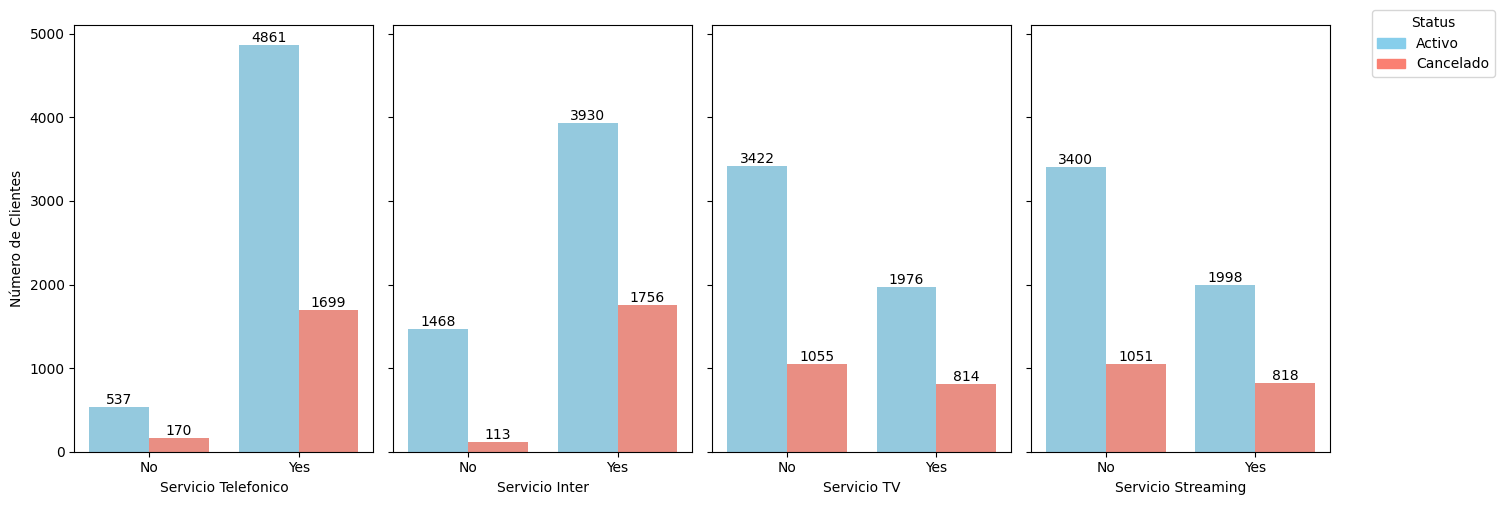

In [ ]:
service_cols = ['Servicio_Telefonico', 'Servicio_Inter', 'Servicio_TV', 'Servicio_Streaming']
existing_service_cols = [col for col in service_cols if col in datos.columns]
fig, axes = plt.subplots(nrows=1, ncols=len(existing_service_cols), figsize=(15, 5), sharey=True)

if len(existing_service_cols) == 1:
    axes = [axes]

palette = {'Activo': 'skyblue', 'Cancelado': 'salmon'}

# Crear Tablas de cada Columna
for i, col in enumerate(existing_service_cols):
    ax = axes[i]
    sns.countplot(ax=ax, x=col, hue='Servicio_Status', data=datos, palette=palette, legend=False, order=order)
    # Agregar las etiquetas de los valores en las barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%d')
    ax.set_xlabel(col.replace("_", " "))
    ax.set_ylabel('Número de Clientes' if i == 0 else '')
    ax.tick_params(axis='x', rotation=0)

# Etiqueda fuera de los graficos
handles = [plt.Rectangle((0,0),1,1, color=palette['Activo']), plt.Rectangle((0,0),1,1, color=palette['Cancelado'])]
labels = ['Activo', 'Cancelado']
fig.legend(handles, labels, title='Status', loc='upper right', bbox_to_anchor=(1, 1), borderaxespad=0.)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


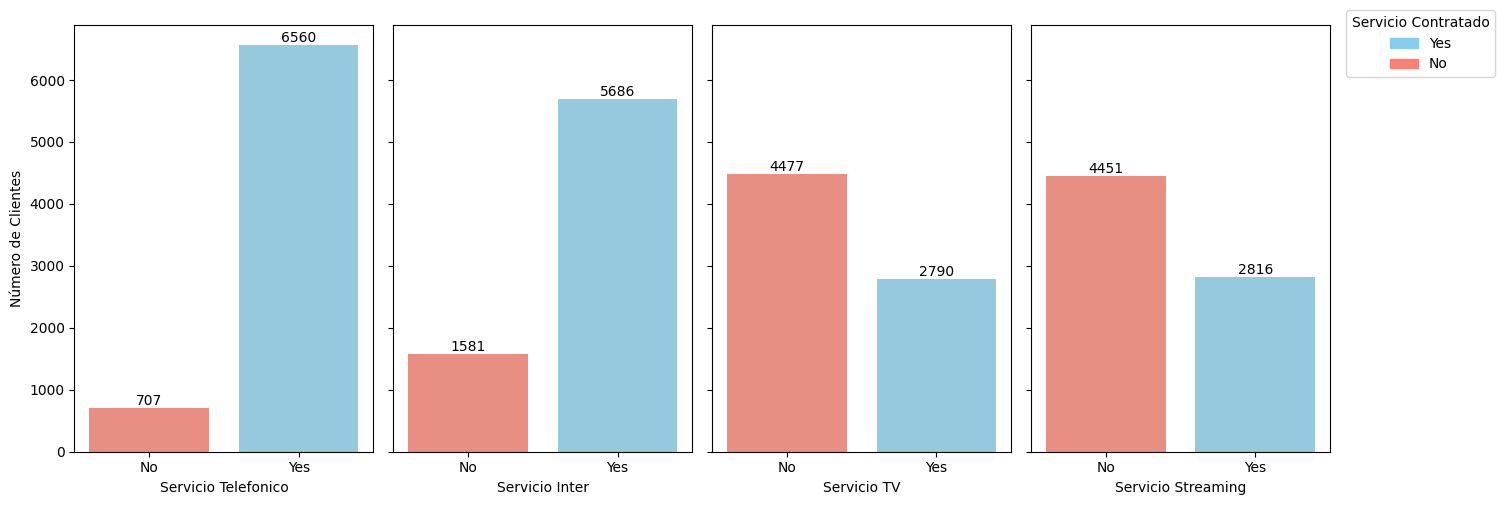

In [ ]:
service_cols = ['Servicio_Telefonico', 'Servicio_Inter', 'Servicio_TV', 'Servicio_Streaming']
existing_service_cols = [col for col in service_cols if col in datos.columns]
fig, axes = plt.subplots(nrows=1, ncols=len(existing_service_cols), figsize=(15, 5), sharey=True)
if len(existing_service_cols) == 1:
    axes = [axes]
palette = {'Yes': 'skyblue', 'No': 'salmon'}

# Crear Tablas de cada Columna
for i, col in enumerate(existing_service_cols):
    ax = axes[i]
    sns.countplot(ax=ax, x=col, hue=col, data=datos, palette=palette, legend=False, order=order)
    # Agregar las etiquetas de los valores en las barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%d')
    ax.set_xlabel(col.replace("_", " "))
    ax.set_ylabel('Número de Clientes' if i == 0 else '')
    ax.tick_params(axis='x', rotation=0)

# UCrear etiqueta
handles = [plt.Rectangle((0,0),1,1, color=palette['Yes']), plt.Rectangle((0,0),1,1, color=palette['No'])]
labels = ['Yes', 'No']
fig.legend(handles, labels, title='Servicio Contratado', loc='upper right', bbox_to_anchor=(1, 1), borderaxespad=0.)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

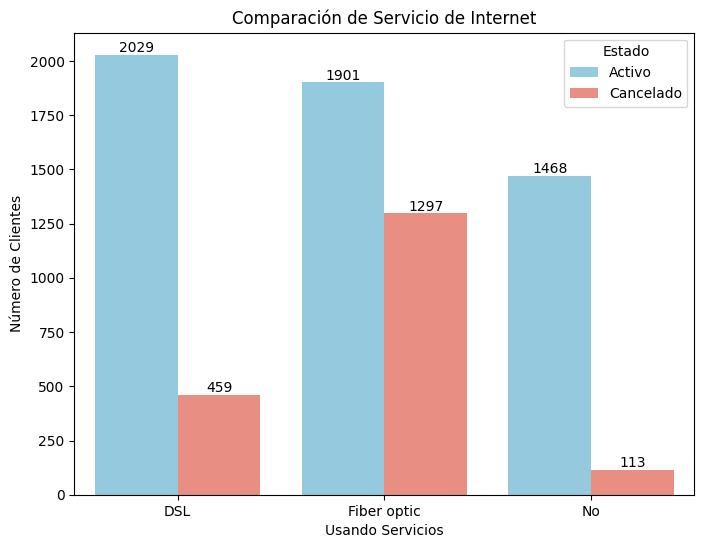

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Servicio_Internet', hue='Servicio_Status', data=datos, palette=palette)

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title('Comparación de Servicio de Internet')
plt.xlabel('Usando Servicios')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Estado')
plt.show()

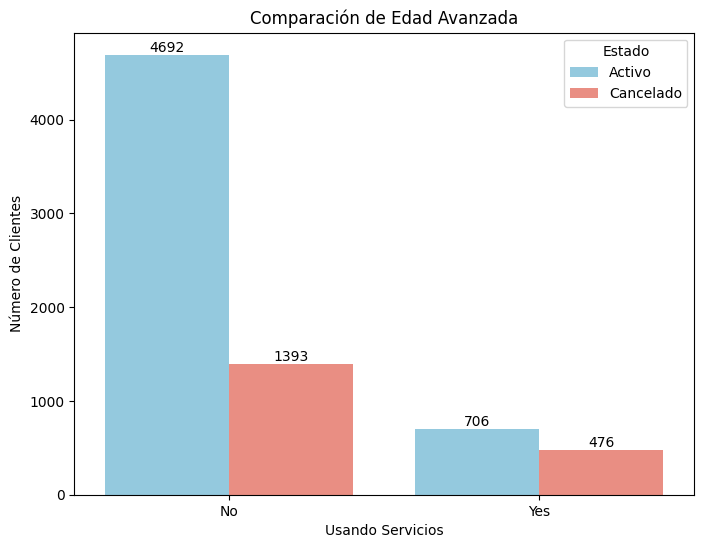

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Edad_Avanzada', hue='Servicio_Status', data=datos, palette=palette, order=order)

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title('Comparación de Edad Avanzada')
plt.xlabel('Usando Servicios')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Estado')
plt.show()

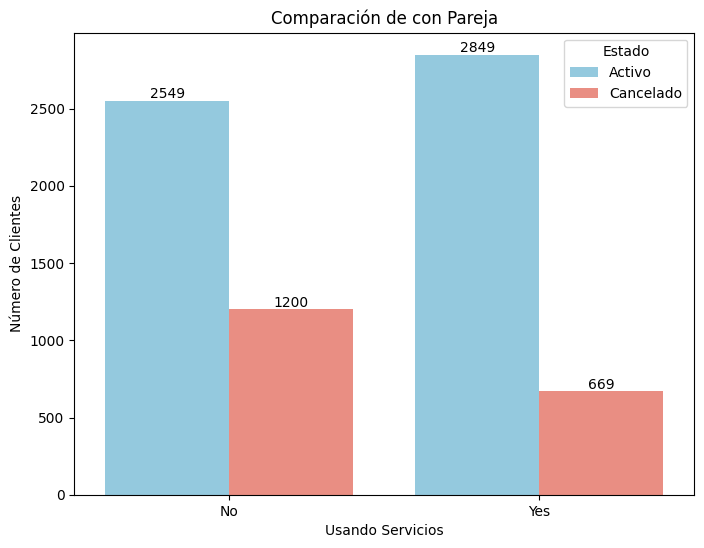

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Tiene_Pareja', hue='Servicio_Status', data=datos, palette=palette, order=order)

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title('Comparación de con Pareja')
plt.xlabel('Usando Servicios')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Estado')
plt.show()

#📄Informe final

**Objetivo:**
El objetivo de este análisis es comprender las características de los clientes y su relación con la cancelación del servicio (Churn).

**Fuente de Datos:**
- Los datos provienen del siguiente URL: https://raw.githubusercontent.com/JosefRivers-Dev/Data-Science_Telecom_Oracle-LATAM/refs/heads/main/TelecomX_Data.json
- El diccionario de datos se encuentra en: https://raw.githubusercontent.com/JosefRivers-Dev/Data-Science_Telecom_Oracle-LATAM/refs/heads/main/TelecomX_diccionario.md

**Descripción del Conjunto de Datos:**
El conjunto de datos contiene información de 7267 clientes de TelecomX y 23 columnas con diferentes atributos.

**Resumen del Proceso de Transformación de Datos:**
- **Normalización de Columnas:** Se renombraron las columnas para una mejor comprensión y se extrajeron los nombres finales después del último punto.
- **Cambio de Nombre a Español:** Se mapearon los nombres de las columnas a español para facilitar el análisis local.
- **Estandarización de Tipos de Datos:**
  - La columna 'Consumo_Total' se convirtió a tipo numérico, manejando posibles errores.
  - La columna 'Edad_Avanzada' se convirtió a tipo 'object'.
- **Limpieza y Estandarización de Valores:**
  - Se reemplazaron valores vacíos en 'Cancelacion_Servicio' por 'No'.
  - Se mapearon los valores numéricos (0, 1) en 'Edad_Avanzada' a ('No', 'Yes').
  - Se estandarizaron los valores 'No phone service' y 'No internet service' a 'No' en las columnas de servicios.
  - **Nota:** Se menciona una opción alternativa para convertir 'Yes'/'No' a 1/0 directamente, aunque no se aplicó en el proceso final de limpieza de texto.

**Análisis Exploratorio y Visualizaciones:**
- **Validación de Servicios:** Se crearon columnas temporales ('Servicio_Status' y 'Servicio_Inter') para facilitar el análisis de la cancelación del servicio.

- **Distribución de Clientes por Estado de Servicio** ('Activo' vs 'Cancelado')
- **Distribución de Clientes por Servicio de Internet** ('Yes' vs 'No')

**Análisis por Servicio y Estado de Cancelación:**
- Se generaron gráficos de barras para visualizar la distribución de clientes activos y cancelados para los servicios de 'Servicio_Telefonico', 'Servicio_Inter', 'Servicio_TV' y 'Servicio_Streaming'.
- Las visualizaciones muestran la cantidad de clientes por cada categoría de servicio, diferenciando entre aquellos que cancelaron y los que se mantuvieron activos.

**Análisis de Otros Atributos y Estado de Cancelación:**
- **Servicio de Internet:** Se visualizó la relación entre tener o no servicio de internet y la cancelación.
- **Edad Avanzada:** Se exploró la relación entre ser una persona de edad avanzada y la cancelación del servicio.
- **Tiene Pareja:** Se analizó si tener pareja influye en la tasa de cancelación.
- Estos gráficos adicionales proporcionan insights sobre cómo ciertas características demográficas y de servicio se asocian con la probabilidad de que un cliente cancele su servicio.